In [3]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
#  reading the csv file into a dataframe
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploratory Data Analysis

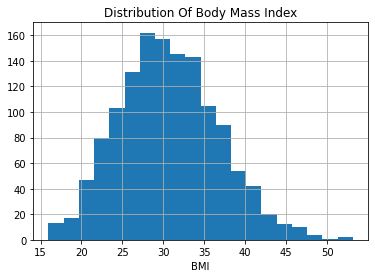

In [8]:
df['bmi'].hist(bins=20)
plt.xlabel('BMI')
plt.title('Distribution Of Body Mass Index');

This shows the body mass index is slightly skewed, with most of the values falling between 25 and 35.

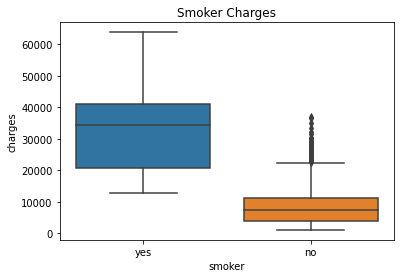

In [9]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker Charges');

This shows smokers have a much higher charge than non-smokers. 

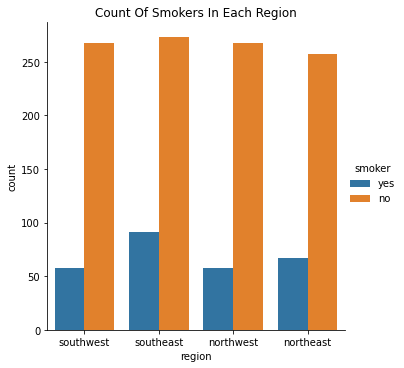

In [10]:
sns.catplot(x ='region', hue='smoker', data=df, kind='count')
plt.title('Count Of Smokers In Each Region');

This clearly indicates that non-smokers are a lot more than smokers in each region and the southeast has the highest number of smokers.

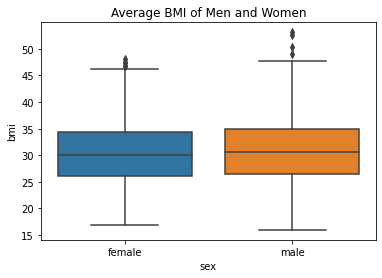

In [11]:
sns.boxplot(y='bmi', x='sex', data=df)
plt.title('Average BMI of Men and Women');

This shows that men have a slightly higher mean bmi than women. 

In [12]:
df.groupby('region')['children'].sum()

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

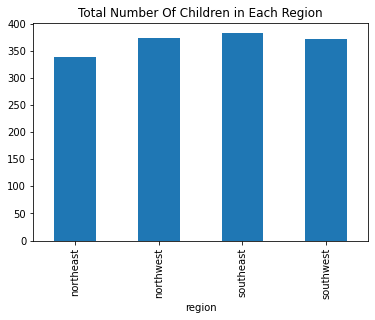

In [13]:
df.groupby('region')['children'].sum().plot(kind='bar')
plt.title('Total Number Of Children in Each Region');

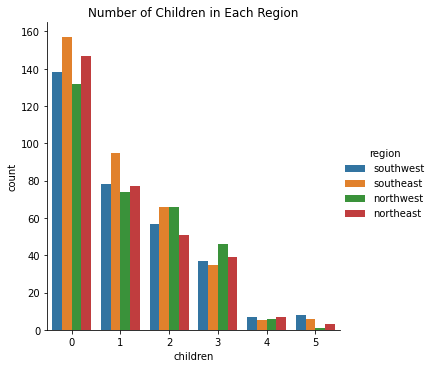

In [14]:
sns.catplot(x='children', hue='region', data=df, kind='count')
plt.title('Number of Children in Each Region');

It would seem that the southeast has the highest number of children.

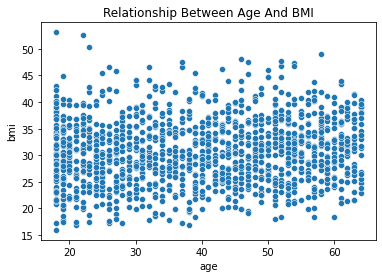

In [15]:
sns.scatterplot(x='age', y='bmi', data=df)
plt.title('Relationship Between Age And BMI');

There is no apparent relationship between Age and BMI

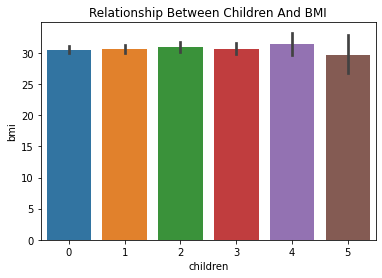

In [17]:
sns.barplot(x='children', y='bmi', data=df)
plt.title('Relationship Between Children And BMI');

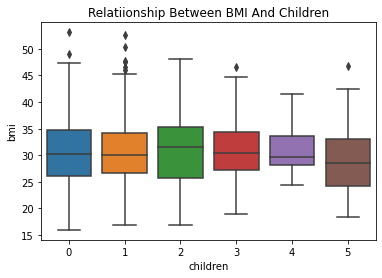

In [16]:
sns.boxplot(x='children', y='bmi', data=df)
plt.title('Relatiionship Between BMI And Children');

It can be seen that people with two or fewer children have a more higher BMI than others.

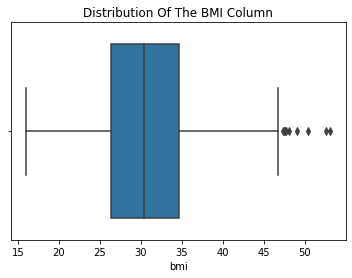

In [18]:
sns.boxplot(x='bmi', data=df)
plt.title('Distribution Of The BMI Column');

There are a few outliers in the BMI column from about 47 upwards.

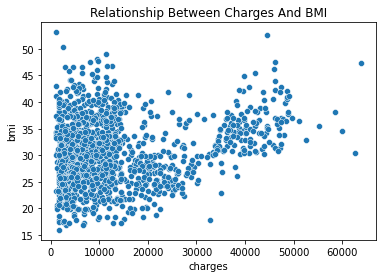

In [19]:
sns.scatterplot(x='charges', y='bmi', data=df)
plt.title('Relationship Between Charges And BMI');

It can be noticed that people with higher charges have a BMI of at least 30. 

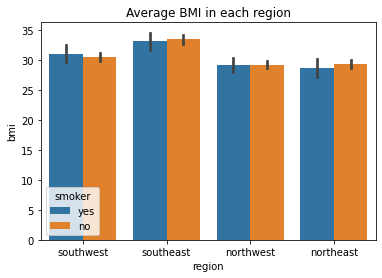

In [20]:
sns.barplot(x='region', y='bmi', hue='smoker', data=df)
plt.title('Average BMI in each region');

It can be seen that the southeast have a higher BMI in both smokers and non smokers than any other region.

# Model Building

## Data Preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [22]:
labelencoder = LabelEncoder()
df['region'] = labelencoder.fit_transform(y=df['region'])
print(df['region'])

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int64


In [23]:
ohe = OneHotEncoder()

In [24]:
#df['sex'].reshape(1,-1)
df['sex'] = labelencoder.fit_transform(df['sex'])
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [25]:
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(columns='charges')
y = df['charges']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(1070, 6)

In [29]:
y_train.shape

(1070,)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [32]:
X_train_scaled

array([[ 0.47222651, -1.0246016 , -1.75652513,  0.73433626, -0.50874702,
        -0.45611589],
       [ 0.54331294, -1.0246016 , -1.03308239, -0.91119211, -0.50874702,
        -1.35325561],
       [ 0.8987451 , -1.0246016 , -0.94368672, -0.91119211, -0.50874702,
         0.44102382],
       ...,
       [ 1.3252637 ,  0.97598911, -0.89153925, -0.91119211, -0.50874702,
        -1.35325561],
       [-0.16755139, -1.0246016 ,  2.82086429,  0.73433626,  1.96561348,
         1.33816354],
       [ 1.1120044 ,  0.97598911, -0.10932713, -0.91119211, -0.50874702,
         1.33816354]])

## Model Selection

### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
lr_model.score(X_test_scaled, y_test)

0.7833237659369185

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
cross_val_score(lr_model, X, y, cv=15)

array([0.80323852, 0.69902073, 0.76020909, 0.76436995, 0.67970975,
       0.63528752, 0.76989256, 0.81732063, 0.72806653, 0.80963144,
       0.75687013, 0.61288271, 0.78274928, 0.72827861, 0.7422704 ])

In [38]:
lr_pred = lr_model.predict(X_test_scaled)

In [39]:
lr_comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": lr_pred})
lr_comparison.head()

,Actual Values,Predictions
764,9095.06825,9176.385747
887,5272.17580,7227.998344
890,29330.98315,37308.876042
1293,9301.89355,9760.919342
259,33750.29180,27237.200725


### Ridge Regression

In [40]:
from sklearn.linear_model import Ridge

In [41]:
r_model = Ridge(alpha = 0.1)
r_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [42]:
r_model.score(X_test_scaled, y_test)

0.7833203960363828

In [43]:
cross_val_score(r_model, X, y, cv=15)

array([0.80318195, 0.69912786, 0.76022161, 0.76433115, 0.67981802,
       0.63532463, 0.76979417, 0.81724212, 0.72816808, 0.8095965 ,
       0.75688907, 0.61298976, 0.78265278, 0.72829743, 0.74230539])

In [44]:
r_pred = r_model.predict(X_test_scaled)

In [45]:
r_comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": r_pred})
r_comparison.head()

,Actual Values,Predictions
764,9095.06825,9176.674882
887,5272.17580,7228.476481
890,29330.98315,37306.412151
1293,9301.89355,9761.338001
259,33750.29180,27235.925074


### Lasso Regression

In [46]:
from sklearn.linear_model import Lasso

In [47]:
ls_model = Lasso(alpha = 0.4)
ls_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.4)

In [48]:
ls_model.score(X_test_scaled, y_test)

0.7833170246219312

In [49]:
cross_val_score(ls_model, X, y, cv=15)

array([0.8032467 , 0.69903516, 0.76021017, 0.76435772, 0.67977115,
       0.63531115, 0.76987757, 0.81729521, 0.72807993, 0.80964132,
       0.75688446, 0.6129061 , 0.78273144, 0.7282879 , 0.74228081])

In [50]:
ls_pred = ls_model.predict(X_test_scaled)

In [51]:
ls_comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": ls_pred})
ls_comparison.head()

,Actual Values,Predictions
764,9095.06825,9175.440754
887,5272.17580,7228.020693
890,29330.98315,37307.367683
1293,9301.89355,9760.937941
259,33750.29180,27237.291605


### Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
dtr_model = DecisionTreeRegressor(max_depth = 3, random_state=14)

In [104]:
dtr_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3, random_state=14)

In [105]:
dtr_model.score(X_test_scaled, y_test)

0.8593200072858882

In [106]:
cross_val_score(dtr_model, X, y, cv=15)

array([0.89833558, 0.82176668, 0.87053808, 0.83742132, 0.8155989 ,
       0.64893614, 0.85980552, 0.87866518, 0.92594845, 0.88633023,
       0.82887134, 0.75587512, 0.88496955, 0.81489643, 0.85863155])

In [107]:
dtr_pred = dtr_model.predict(X_test_scaled)

In [108]:
dtr_comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": dtr_pred})
dtr_comparison.head()

,Actual Values,Predictions
764,9095.06825,10406.771387
887,5272.17580,6350.825424
890,29330.98315,24994.450730
1293,9301.89355,10406.771387
259,33750.29180,36691.432425


## Hyper parameter Optimization

In [109]:
dtr_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 14,
 'splitter': 'best'}

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
dtr_params = {'max_depth':[2,3,4,5]
              }

In [112]:
dtr_grid = GridSearchCV(estimator=dtr_model, param_grid=dtr_params, scoring='neg_mean_squared_error', cv=5, verbose=5)

In [113]:
dtr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............max_depth=2;, score=-26629215.509 total time=   0.0s
[CV 2/5] END ...............max_depth=2;, score=-20664312.537 total time=   0.0s
[CV 3/5] END ...............max_depth=2;, score=-25651182.201 total time=   0.0s
[CV 4/5] END ...............max_depth=2;, score=-30216872.110 total time=   0.0s
[CV 5/5] END ...............max_depth=2;, score=-25507079.986 total time=   0.0s
[CV 1/5] END ...............max_depth=3;, score=-25314883.116 total time=   0.0s
[CV 2/5] END ...............max_depth=3;, score=-15730384.422 total time=   0.0s
[CV 3/5] END ...............max_depth=3;, score=-22532380.368 total time=   0.0s
[CV 4/5] END ...............max_depth=3;, score=-27896373.333 total time=   0.0s
[CV 5/5] END ...............max_depth=3;, score=-25020567.387 total time=   0.0s
[CV 1/5] END ...............max_depth=4;, score=-24294767.004 total time=   0.0s
[CV 2/5] END ...............max_depth=4;, score=-

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=3, random_state=14),
             param_grid={'max_depth': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=5)

In [114]:
dtr_grid.best_params_

{'max_depth': 4}

In [115]:
dtr_grid.best_estimator_.score(X_test, y_test)

0.8641310379678357

## Model Evaluation

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [117]:
tuned_pred = dtr_grid.predict(X_test)

In [118]:
print('MAE:', mean_absolute_error(y_test,tuned_pred))
print('MSE:', mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, tuned_pred)))

MAE: 2697.7654305384813
MSE: 21093484.004597444
RMSE: 4592.764309715603


In [119]:
print('MAE:', mean_absolute_error(y_test,dtr_pred))
print('MSE:', mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtr_pred)))

MAE: 2969.1000368759715
MSE: 21840390.415137798
RMSE: 4673.3703485961605
